# Modeling Walkthrough

The purpose of this section is to go through modeling data using python. This will involve two major sections, traditional regressions and machine learning.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import random as rd
import sklearn as sk

In [46]:
pokemon_df=pd.read_csv('./data/pokemon_data.csv')

## Regressions

Regressions are a traditional statistical tool that is incredibly useful for take quantitative inputs and outputting a quantitative output. Most often this comes in the form of predicting behavior, which of course is why we're discussing them in modeling.

As a quick reminder from the stats notebook, here is a useful flowchart for determining which statistical tools to use. 

<img src="img/test_flowchart.png" alt="Testing Flow Chart" width="700"  style="float:left"/>

### Simple Regression

Simple linear regressions are the most well-known regression type. It simply attempts to understand the relationship between two variables, x (the input) and y (the output). As you can imagine, the simplicity of such a regression lends the regression to working with simple problems.

In our context of pokemon, let's plot the association between defense and special defense and generate a regression. In other words, given the normal defense stat of a particular pokemon, what is the special defense stat?

Text(0.5, 1.0, 'Defense vs. Sp. Def')

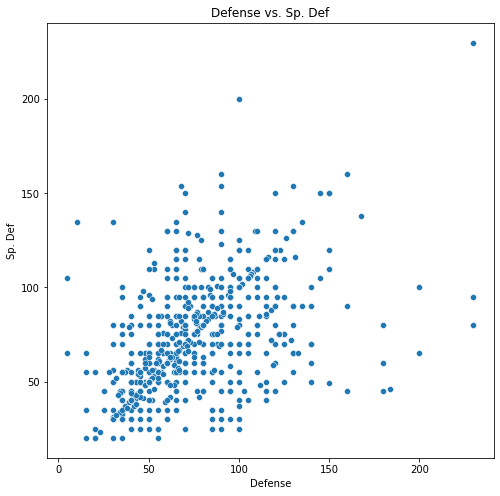

In [47]:
defense_df = pokemon_df[['Defense','Sp. Def']]

plt.figure(figsize=(8,8))
sns.scatterplot(data=defense_df, x='Defense', y='Sp. Def')
plt.title('Defense vs. Sp. Def')

As you can probably make out, it looks as if there is some straight line relationship to the Defense and Special Defense. However generate a regression and a few measures to evaluate how accurate the regression is. 

C:\Users\Gunna\Documents\My_Code\data_science_notes\env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The formula of our regression is y=0.46x+38.24
The R Squared value of our regression is 0.51.


<Figure size 576x576 with 0 Axes>

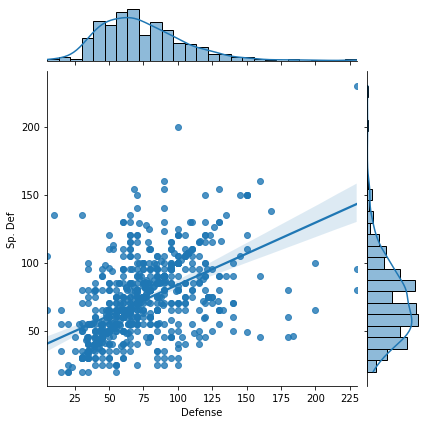

In [68]:
# fitting our model
model=stats.linregress(defense_df.loc[:,'Defense'], defense_df.loc[:,'Sp. Def'])

defense_df['Sp. Def Predicted']=defense_df['Sp. Def'].apply(lambda x : x*model.slope + model.intercept)

plt.figure(figsize=(8,8))
sns.jointplot(data=defense_df, x='Defense', y='Sp. Def', kind='reg')

print('The formula of our regression is y={:.2f}x+{:.2f}'.format(model.slope, model.intercept))
print('The R Squared value of our regression is {:.2f}.'.format(model.rvalue))

An R Squared value of 0.51 is fairly interesting. Remember that an R squared value should be interpreted as "R percent of the variability in y can be explained by the variability in x". As you can imagine, there is a lot of room for improvement in terms of sophistication in modeling.

### Multivariate Linear Regressions

We can expand on the simple linear regression by doing what's called a multivariate linear regression.

## Training and Test Datasets

I'm gonna take a second to talk about splitting up your datasets. When creating models, it is very intuitive to think that we should pass through all of our data to create a good model. However, we must be wary of a concept known as overfitting. Overfitting is when you fit your model too well to the data we have presently, but the model fails to predict the underlying trend when introduced to new data. Therefore, we should always take a subset of data to train our model on. 

So what should we do with the other half the model isn't trained on? This will be used as our test dataset. This is the dataset that will be used to evaluate the efficacy of our model. That way, we can truly have an understanding of how well our model is picking up the underlying trends. The concepts of overfitting and splitting your data out are not that relevant with simple linear regressions. However, the become increasingly important as model complexity increases.